<a name="prob_b"></a>    
**problem coding B**:

1.  Now solve the following test equation by both the midpoint and
    Heun’s method and compare. $$f(y,t) = t - y  + 1.0$$ Choose two sets
    of initial conditions and investigate the behaviour.

2.  Is there any difference between the two methods when applied to
    either problem? Should there be? Explain by analyzing the steps
    that each method is taking.


1). I rewrote the derivative as follows in the equation derivsB, then used that derivative in the midpoint and heun methods - slightly modifying the code from the lab. I chose initial conditions of y = -100 and y = 100, and plotted several subplots showing the behaviour of the solution. 


2). No, both methods give the same answer. 

-100.0
-100.0
400
-100.0
100.0
100.0
400
100.0


/Users/alena/anaconda/lib/python3.4/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


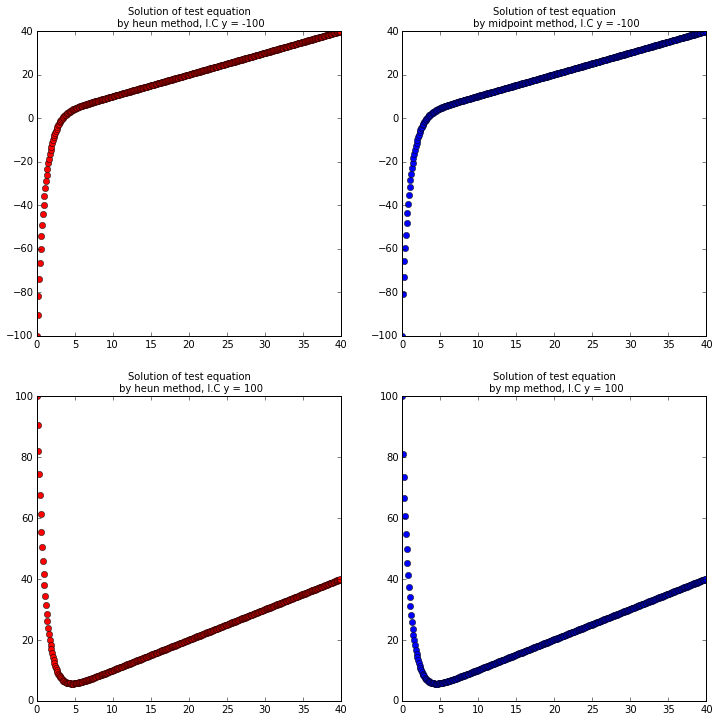

In [30]:
%matplotlib inline
import numpy as np
import json
from numlabs.lab4.example.test import read_init
from matplotlib import pyplot as plt
#
# specify the derivs function
def derivsB(coeff,y,t):
#    f = np.empty_like(y) #2 element vector for derivative

    f= - coeff.c1*y + coeff.c2*t + 1
    return f

def midpoint4(coeff, y, derivsB,t):
    ynew = y + coeff.dt*derivsB(coeff,y,t + (0.5 * coeff.dt * derivsB(coeff,y,t)),)
    return ynew

def heun2(coeff, y, derivs,t):
    k1 = coeff.dt * derivsB(coeff,y,t)
    k2 = coeff.dt * derivsB(coeff,y + ((2.0/3.0) * k1),t)
    ynew = y + (1.0/4.0) * (k1) + (3.0/4.0) * (k2)
    return ynew


initialVals={'yinitial': -100.,'t_beg':0.,'t_end':40.,'dt':0.1,'c1':1.,'c2':1.}
initialVals['comment'] = 'written Sep. 29, 2015'
initialVals['plot_title'] = 'simple damped oscillator run 1'

infile='run_1.json'
with open(infile,'w') as f:
      f.write(json.dumps(initialVals,indent=4))
#
#  now read the initial information into a namedtuple coeff

infile='run_1.json'
coeff=read_init(infile)
# integrate and save the result in savedata
y = coeff.yinitial
time=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
nsteps=len(time) 

heunsData = np.empty([nsteps],'float')
heunsData[0] =y
print(heunsData[0])
mpData = np.empty([nsteps],'float')
mpData[0] =y
print(mpData[0])

print(nsteps)

for i in range(1,400):
    t = time[i]
    y=heun2(coeff,y,derivsB,t)
    ymp = midpoint4(coeff,y,derivsB,t)
    heunsData[i]=y
    mpData[i] = ymp

print(mpData[0])
    
heun_1 = heunsData;
mp_1 = mpData;
###

initialVals={'yinitial': 100.,'t_beg':0.,'t_end':40.,'dt':0.1,'c1':1.,'c2':1.}
initialVals['comment'] = 'written Sep. 29, 2015'
initialVals['plot_title'] = 'simple damped oscillator run 1'

infile='run_1.json'
with open(infile,'w') as f:
      f.write(json.dumps(initialVals,indent=4))
#
#  now read the initial information into a namedtuple coeff

infile='run_1.json'
coeff=read_init(infile)
# integrate and save the result in savedata
y = coeff.yinitial
time=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
nsteps=len(time) 

heunsData = np.empty([nsteps],'float')
heunsData[0] =y
print(heunsData[0])
mpData = np.empty([nsteps],'float')
mpData[0] =y
print(mpData[0])

print(nsteps)

for i in range(1,400):
    t = time[i]
    y=heun2(coeff,y,derivsB,t)
    ymp = midpoint4(coeff,y,derivsB,t)
    heunsData[i]=y
    mpData[i] = ymp

print(mpData[0])
    
heun_2 = heunsData;
mp_2 = mpData;

fig, big_axes = plt.subplots( figsize=(12.0, 12.0) , nrows=3, ncols=1, sharey=True) 
for row, big_ax in enumerate(big_axes, start=1):
    big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    big_ax._frameon = False


for i in range(1,5):
  
    ax = fig.add_subplot(2,2,i)
    if i == 1:
        y = heun_1    
        color = 'ro'
        str = "heun method, I.C y = -100"

    elif i == 2:
        y = mp_1
        color = 'bo'
        str = "midpoint method, I.C y = -100"
    elif i == 3:
        y=heun_2      
        color = 'ro'
        str = "heun method, I.C y = 100"
    elif i == 4:
        y= mp_2
        color = 'bo'
        str = "mp method, I.C y = 100"        

    ax.plot(time,y, color)
    ax.hold(True)
    titl =  "Solution of test equation \n by " + str
    ax.set_title(titl, fontsize = 10)
    ax.legend(loc=2,prop={'size':6})
    if (i == 2):
        ax.set_ylim((-100,40))

fig.set_facecolor('w')
plt.show()




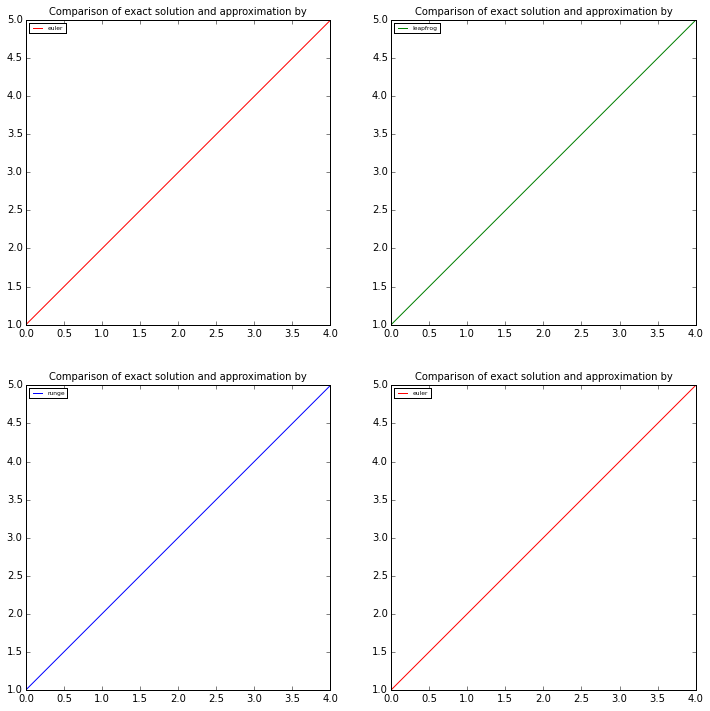

In [31]:
fig, big_axes = plt.subplots( figsize=(12.0, 12.0) , nrows=3, ncols=1, sharey=True) 
for row, big_ax in enumerate(big_axes, start=1):
    big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    big_ax._frameon = False

#this way of doing things is silly but oh well I am not that good at python
    
for i in range(1,5):
  
    ax = fig.add_subplot(2,2,i)
    if i == 1:
        funChoice = 'euler'
        npts = 10
        color = 'r'
    elif i == 2:
        funChoice = 'leapfrog'
        npts = 10
        color = 'g'
    elif i == 3:
        funChoice = 'runge'
        npts = 10
        color = 'b'    
    elif i == 4:
        funChoice = 'euler'
        npts = 50
        color = 'r'

        
    approxTime =[0,1,2,3,4]
    approxTemp =[1,2,3,4,5]
    ax.plot(approxTime,approxTemp, color, label = funChoice)
    ax.hold(True)
    titl =  "Comparison of exact solution and approximation by"
    ax.set_title(titl, fontsize = 10)
    ax.legend(loc=2,prop={'size':6})

fig.set_facecolor('w')
plt.show()